# Welfare Costs of Short-Run Price Volatility

In [3]:
import os
import time
import numpy as np
from scipy import stats
import WCPV
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
%matplotlib inline
plt.style.use('seaborn-whitegrid')
mpl.style.use('seaborn')
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]


%load_ext line_profiler
%load_ext memory_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [ ]:
%%time
test = WCPV.Logit() # Initialize
test.sample() # Add sample
test.solve_npv() # solve without price volatility
test.solve_fp() # solve w. flexible prices

Price variation:

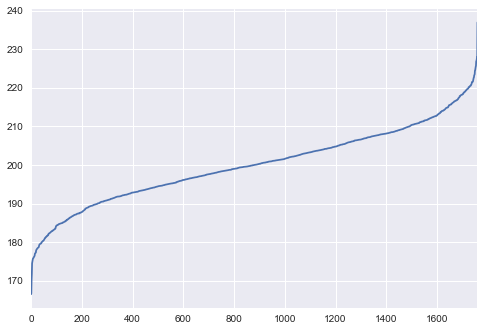

In [3]:
pd.Series(test.ph).sort_values().reset_index(drop=True).plot();

Variation in consumption:

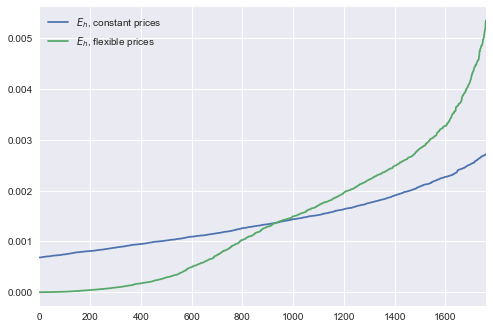

In [4]:
pd.DataFrame({'$E_h$, constant prices': pd.Series(test.npv['Eh']).sort_values().reset_index(drop=True),
              '$E_h$, flexible prices': pd.Series(test.fp['Eh']).sort_values().reset_index(drop=True)}).plot();

## **1: Setup**

We consider the incredibly simple static maximization problem:

$$\begin{align}
    U &= \max_{C,E} C^{\alpha}E^{1-\alpha}, \\ 
    \text{s.t. }I&= C+pE, 
\end{align}$$
with the standard simple solution
$$\begin{align}
    C &= \alpha I \\ 
    E &= (1-\alpha)\dfrac{I}{p}
\end{align}$$

Consider instead the case where $E$ is split into a number of hours $h\in\lbrace 1,...,H\rbrace$ with hourly prices $p_h$. Augment the utility function to accomodate bliss point preferences / price volatility aversion. As outlined in the paper this implies the form
$$\begin{align}
    U = \max_{C,E} C^{\alpha}E^{1-\alpha}+u^{hour}(E_1,...,E_H)+u^{h,scale}(E),
\end{align}$$
with $E=\sum_h E_h$ and $p = \sum_h p_hE_h/E$.

The first order conditions are now on the form:
$$\begin{align}
\lambda &= \alpha \left(\dfrac{C}{E}\right)^{\alpha-1} \tag{1}\\
p_h \lambda &= (1-\alpha)\left(\dfrac{C}{E}\right)^{\alpha}+\dfrac{\partial u^{hour}}{\partial E_h}+\dfrac{\partial u^{h,scale}}{\partial E} \tag{2}
\end{align}$$

Combination of (2) for hours $h,j$ implies
$$\begin{align}
    \dfrac{\partial u^{hour}}{\partial E_h} - \dfrac{\partial u^{hour}}{\partial E_j} = \lambda(p_h-p_j). \tag{3}
\end{align}$$

## **2: Logit example**

The logit-like example applies the functional forms (notation from paper adopted):

$$\begin{align}
    u_h &=  \dfrac{1}{\sigma}\ln\left(\tilde{u}_h\right) \\
    \tilde{u}_h&= \exp\left(\sigma\lambda(p_h-p_t)\right) \\
    \chi_h(\tilde{u}_h) &= \underline{D}+\dfrac{(1-\underline{D})(\overline{D}-\underline{D})}{1-\underline{D}+(\overline{D}-1)\tilde{u}_h}
\end{align}$$

Using the interpretation of the bliss point as $E_t^*$ (the level in absence of price volatility), the implied utility function becomes (notation in the paper):

$$\begin{align}
    u_h^{hour} = \dfrac{1}{\sigma}\left[E_h\ln\left(\dfrac{1-\underline{D}}{\overline{D}-1}\right)-(E_h-\underline{E}_h)\ln\left(E_h-\underline{E}_h\right)-\left(\overline{E}_h-E_h\right)\ln\left(\overline{E}_h-E_h\right)\right]
\end{align}$$

## **3: Multinomial Logit Example**